## Project - LineArtTSP

### Group member: Duedahl Mathias, Antoine Neveu, Jianing Lyu


### Introduction:
Approximate images using a single closed curve generated by halftoning the image and finding a cycle by solving TSP on the generated stippling points.

The backbone of this project will consist of these major components:

Halftone an arbitrary image and convert points to graph object Find non self intersection Hamiltonian cycle on nodes by solving TSP using heuristic Plot the resulting curve

## Halftoning

The purpose of halftoning is to approximate an image with a set of points.

Introduction to our Halftoning implementation: 

Takes a random selection of n points (see below) from the image. If one is using the contrast halftoning method, it will compare these points to the point x_pixel_distance and y_pixel_distance away from the chosen point
(see docstring for specific information) and accept the point if it is sufficiently different from this neighbor point, based on the application of a euclidean metric to RGB values, conditioned on an input contrast_threshold value.
One can 'smoothen' this acceptance of points (i.e. accepting points in a neighborhood of the contrast based on a probability function) by setting the smoothing_constant to a value between 0 and 1 (0 means no smoothing, 1 means most
generous probability function). 

If one is using the brightness method, it will convert the image to grayscale, and perform rejection sampling (see https://en.wikipedia.org/wiki/Rejection_sampling) on n points, based on the brightness of n randomly chosen points. 

For either method, one can set 'invert' to True in order to reverse the functions of each of these methods. This ends up meaning exactly what one would intuitively expect - for the contrast method, it will instead only choose points that are similar to nearby points, and for the brightness method, it will choose points that are lighter, rather than points that are darker.

An interesting extension about halftone: https://tabreturn.github.io/code/processing/python/2019/02/09/processing.py_in_ten_lessons-6.3-_halftones.html



## TSP

TSP is the traveling salesman problem, the purpose of which is to find the shortest cycle that includes all nodes in a graph. 
In our case, this means we will attempt to find the shortest cycle that goes through every halftoning point, as this will
approximate our image with one line, instead of a series of points.

We do not implement a TSP solver ourselves, we use the OR-tools package from Google to do this, see more here:
https://developers.google.com/optimization/routing/tsp





## Guide
First you should decide on a couple of things:

1. Which image do you want to convert to a line drawing?
2. n - The number of points that the graph will use (think of it as the resolution of your output image)
3. timelimit - How long are you willing to let the TSP solver run? (the longer the better the result)
4. imagestyle - Which style do you want your halftoning to have?
5. style - Which style do you want your output to have?

There are three different styles to choose, one is points, which is result of an image after halftoning, and the other two styles are line and spline, which connected selected points by a closed line, the latter being a smoothened variant.  

First we import our custom class and halftoning function:

In [8]:
from graph import Graph
from halftoning import rejectionSampling

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Set the path variable to the path of your chosen image.
Set n to the amount of points you want.
Halftone the image based on desired imagestyle (halftoning or brightness; for now, we will use brightness, with an example of when contrast can be better to use). Our program will select points randomly, and use rejection sampling based on the grey_scale value of these points (in the case of brightness) in order to choose whether the point will be accepted - this results in darker regions of an image having more points selected, and hence being accentuated more in the final product.

By increasing n (number of points), the clarify of the resultant graph can be increased.

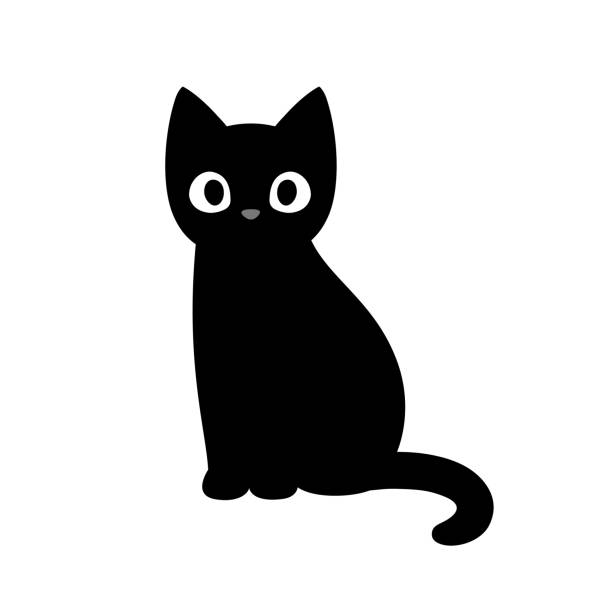

In [11]:
# Generate test data points
n=1000
# Path to image file
path = 'recurrentTheme.jpg'
# Generate points
nodes1 = rejectionSampling(n, path, imagestyle = "brightness")

#See the image here:
from IPython.display import Image
Image(filename=path) 

Then, we create our graph object, set the nodes to those chosen in our halftoning process, and calculate the distance matrix of these nodes.

Finally, we solve the traveling salesman problem based on a time limit - the code will attempt to find an optimal path during this time, and return the best path at the end of the time.

In [3]:
# Create graph object solve TSP
G = Graph()
G.setNodes(nodes1)
G.setDistMatrix()
G.TSP(timelimit=30);

100%|██████████| 990/990 [00:05<00:00, 197.09it/s] 


TSP solver framework constructed. Setting solver parameters
Solving...
Solver finished


Here is an example of the points chosen by the brightness method, plotted, i.e. the 'points' style.

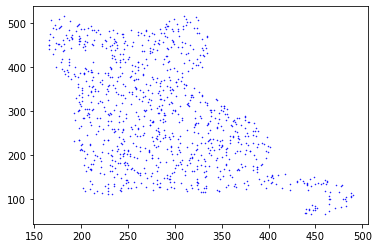

In [4]:
G.plot(style="point") 

Here is an example of the graph following an application of the traveling salesman problem, with nodes connected by lines, i.e. the 'lines' style.

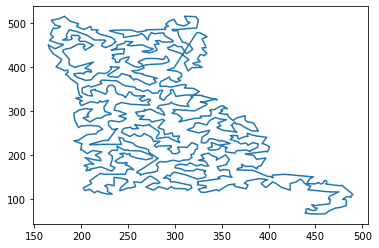

In [5]:
G.plot(style="line")

Finally, here is an example of the graph following an application of the traveling salesman problem, with nodes connected by splines, i.e. the 'splines' style.

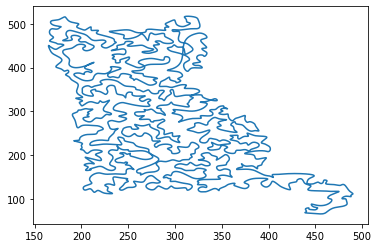

In [6]:
G.plot(style="spline")

If, instead, we choose to use the imagestyle "contrast", then our halftoning will instead select points based on how different they are from a neighboring point, on a scale of 0 to 1.(this neighboring point can be determined, for all points, by using x_pixel_distance and y_pixel_distance parameters) using the euclidean metric applied to RGB values. How much contrast we use is determined by our contrast_threshold, which has a default value of 0.15 - this can be changed by setting contrast_threshold to the desired value in the rejectionSampling parameters.

The contrast method tends to be a superior option when working with an image where regions of color are clearly separated, or where one determines that there is more value to be had in graphing the 'edges' of these images, rather than the contents of the regions of color - this method falls short where neighboring points of any point are almost ubiquitously sufficiently contrasting, such as in an extremely detailed painting like the 'Mona Lisa'.

100%|██████████| 977/977 [00:04<00:00, 235.32it/s] 


TSP solver framework constructed. Setting solver parameters
Solving...
Solver finished


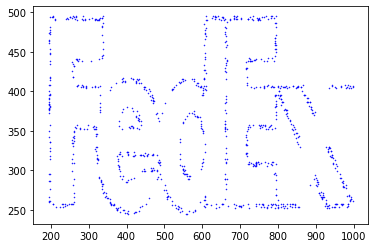

In [12]:

path2 = 'fedex.jpg'
nodes2 = rejectionSampling(n, path2, imagestyle = "contrast")
R = Graph()
R.setNodes(nodes2)
R.setDistMatrix()
R.TSP(timelimit=30);
R.plot(style="point") 

An image such as the Fedex logo, for example, yields a better end result when using the contrast method. 

100%|██████████| 996/996 [00:06<00:00, 165.39it/s] 


TSP solver framework constructed. Setting solver parameters
Solving...
Solver finished


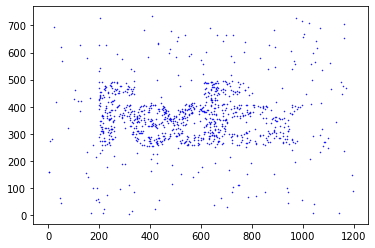

In [14]:
nodes3 = rejectionSampling(n,path2,imagestyle='brightness')
A = Graph()
A.setNodes(nodes3)
A.setDistMatrix()
A.TSP(timelimit=30);
A.plot(style="point") 

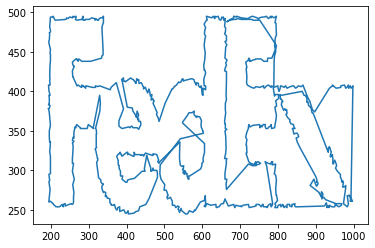

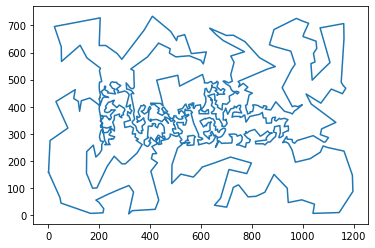

In [15]:
R.plot(style="line")
A.plot(style="line")


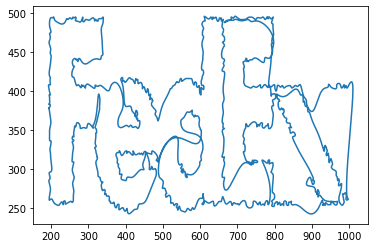

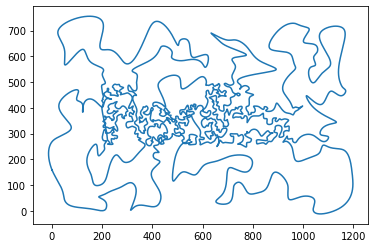

In [16]:
R.plot(style="spline")
A.plot(style="spline")

There are a few other ways to differentiate the halftoning based on the image, in order to achieve a better end result. 

Within the contrast method, one can set a smoothing constant to a value between 0 and 1 (default value 0, to indicate no smoothing; 1 indicates most smoothing possible. This is done by setting smoothing_constant to desired value in rejectionSampling parameters). This results in the creation of a linear probability density function in a neighborhood of our contrast_threshold, that accepts points in this neighborhood with a probability that increases based on how much contrast is present. This is optimal when working with an image where important regions of the image are barely not sufficiently contrasting enough in order to lower the contrast threshold without introducing too much random noise, as it allows us to be more generous with these important areas, without losing too much clarity to noise.

As mentioned, one can set the x_pixel_distance and y_pixel_distance in rejectionSampling parameters in order to determine the neighboring point that randomly chosen points are compared to in the contrast method. We reccomend keeping this very low (<10) - default values are 5 and 5 respectively. The best way to make use of these values is to choose distances that create a direction that is most perpendicular with the direction of edges in our image, as otherwise the method may occasionally compare points parallel to an 'edge' (border of color regions), and not notice any contrast.

For either method, one can set the invert parameter in rejectionSampling to True (default is False) in order to reverse the functions of each halftoning method. For the brightness method, this ends up meaning choosing points based off how light they are, rather than how dark they are. For the contrast method, this means selecting points with neighboring points that are similar, rather than contrasting, to their RGB values. The utility of the invert for brightness intuitively obvious (object of focus within image is light, rather than dark). For the contrast method, we can use this invert method when working with an image where we have an abundance of noise (regions where pixels are tremendously contrasting), except for an object of focus with a mostly uniform color (imagine a picture of a uniformed football player, with a rainbow of thousands of fans in the background).
